In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
dataset = pd.read_csv('/content/drive/MyDrive/gt_2014.csv')
dataset.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16  11.381   
1  9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51  11.476   
2  9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96  11.555   
3  9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83  11.539   
4  9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56  11.484   

       CO     NOX  
0  1.9157  68.292  
1  2.0596  68.610  
2  2.1621  68.324  
3  2.1214  67.619  
4  2.1549  66.499

In [127]:
#checking if there's a duplicate

dataset[dataset.duplicated(keep = False)]

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
4207  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
4208  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
4209  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
4210  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
4211  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
5197  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   
5198  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   
5199  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   
5200  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   

          CO     NOX  
4207  1.7056  47.352  
4208  1.7056  47.352  
4209  1.7056  47.352  
4210  1.7056  47.352  
4211  1.7056  47.352  
5197  1.3163  52.564  
5198  1.3163  52.564  
5199  1.3163  52.564  
5200  1.3163  52.564

In [128]:
# Drop duplicate rows
dataset_cleaned = dataset.drop_duplicates()

# Checking if duplicates are removed
print(dataset_cleaned[dataset_cleaned.duplicated(keep=False)])

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []


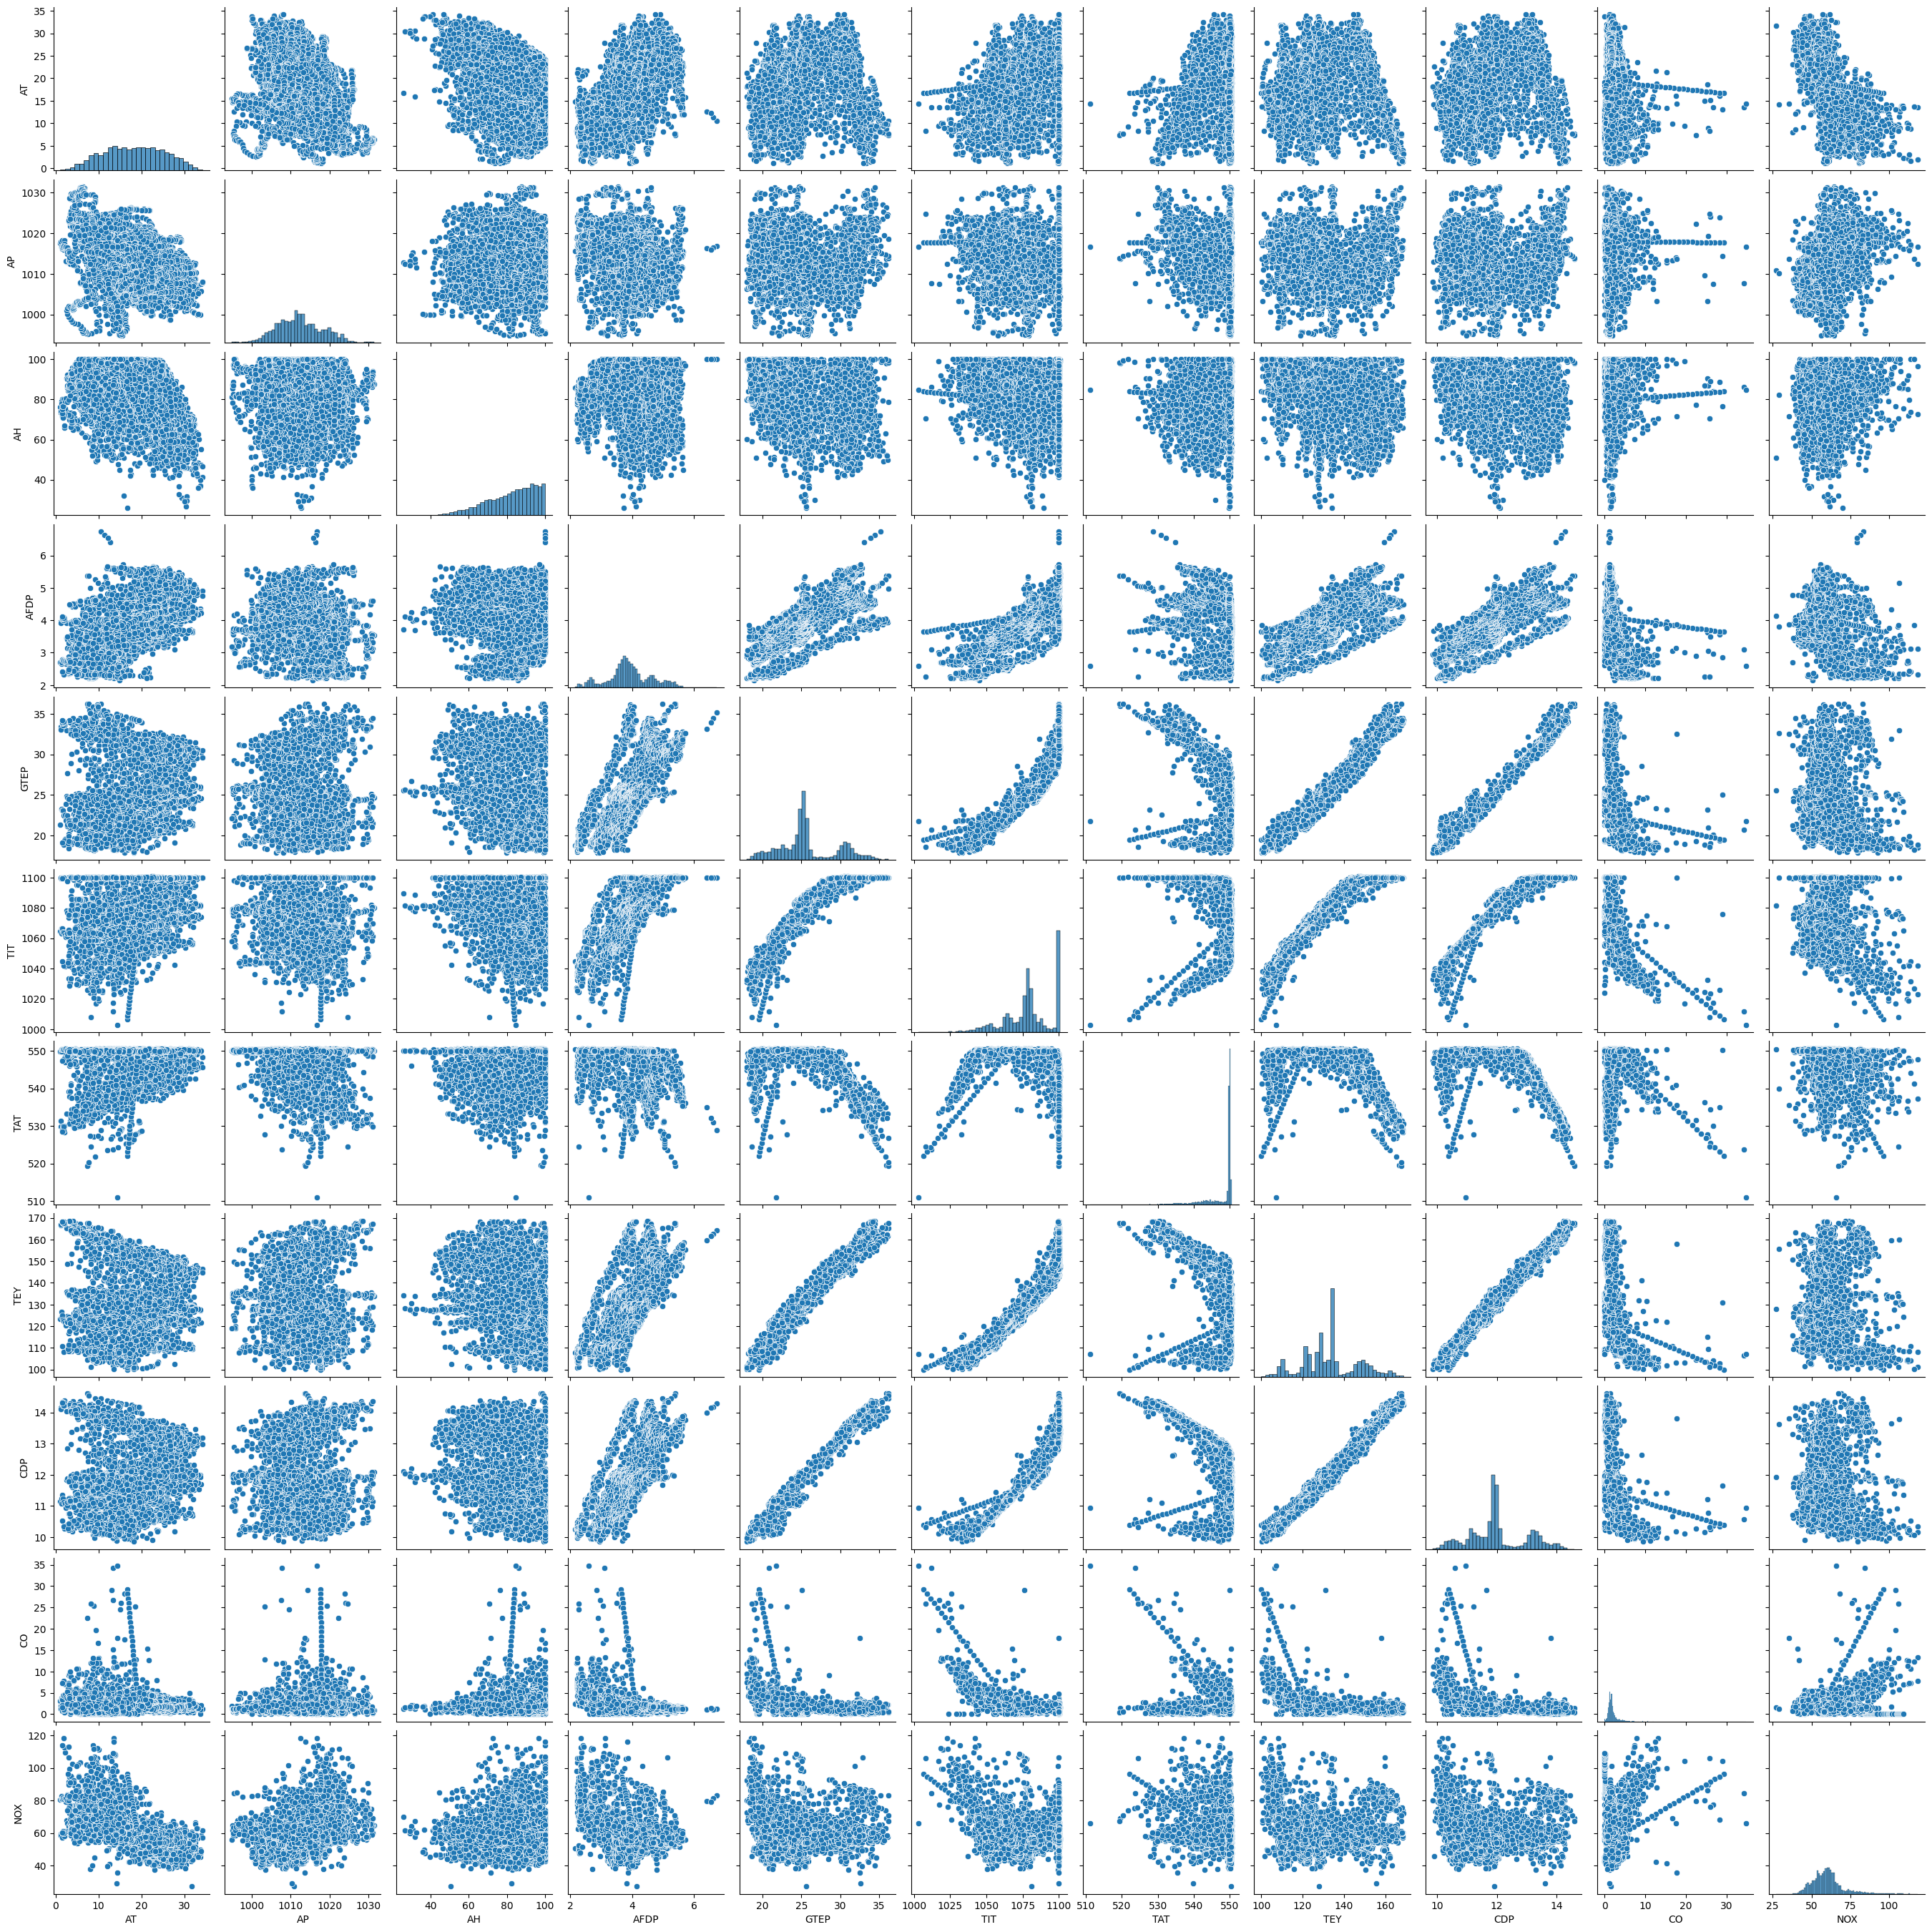

In [129]:
sns.pairplot(dataset)

In [137]:
# Separate features(X) and target variable(Y)
X = dataset[['AFDP', 'TIT', 'TEY', 'CDP']]
y = dataset['GTEP']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_prediction = model.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

lr_mse, lr_rmse, lr_r2 = evaluate_model(y_test, y_prediction)

print("Linear Regression Metrics:")
print("MSE: ", lr_mse)
print("RMSE: ", lr_rmse)
print("R-squared: ", lr_r2)

Linear Regression Metrics:
MSE:  0.24035995246150607
RMSE:  0.49026518585506973
R-squared:  0.9822972868366473


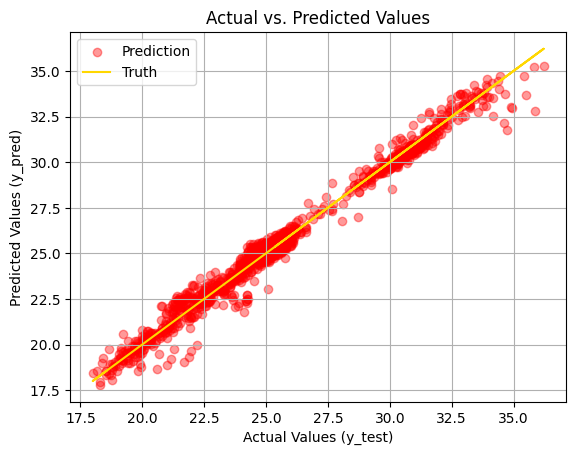

In [140]:
plt.scatter(y_test, y_prediction, color='red', alpha=0.4, label='Prediction')

plt.plot(y_test, y_test, color='gold', label='Truth')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

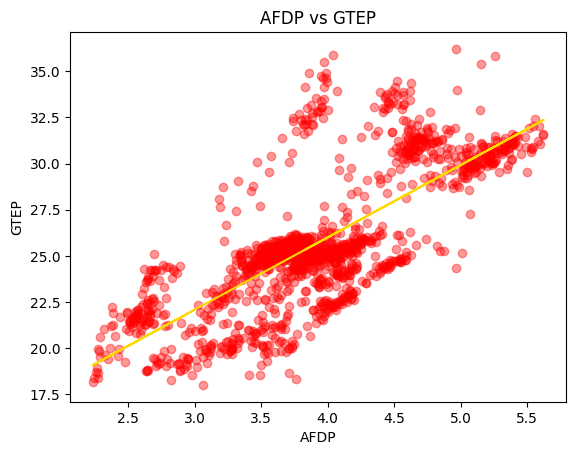

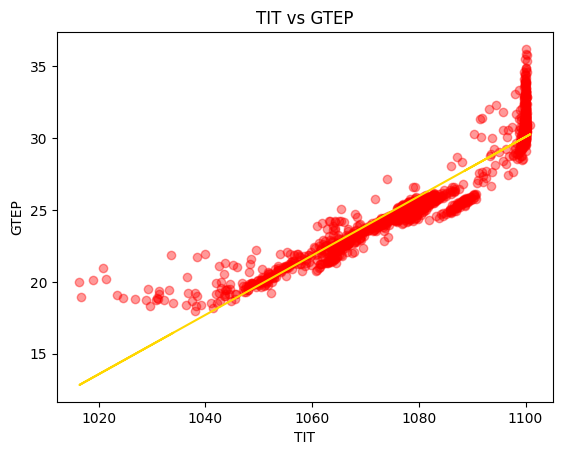

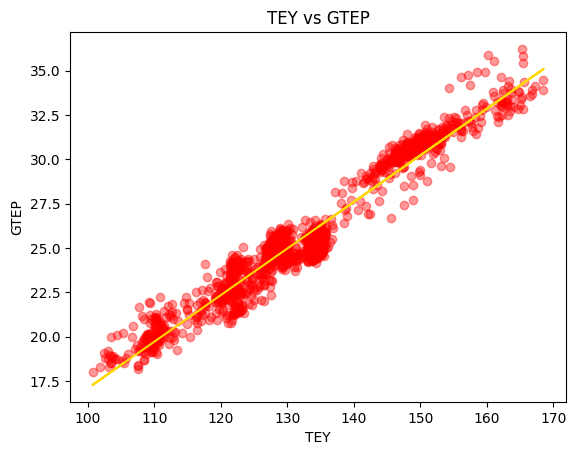

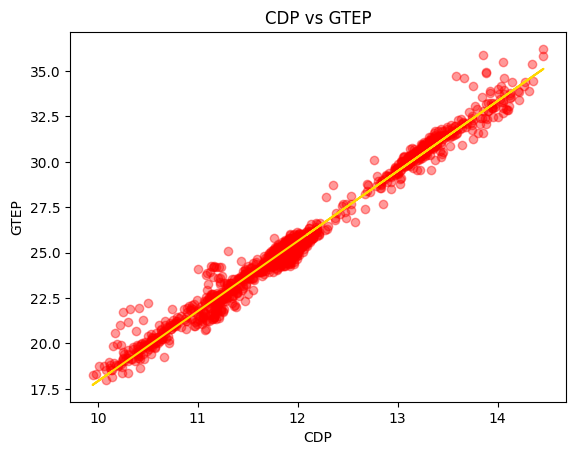

In [114]:
# Iterate over each independent variable
for feature in features:
    # Scatter plot
    plt.scatter(X_test[feature], y_test, alpha=0.4, color='red')

    # Fit regression line
    m, b = np.polyfit(X_test[feature], y_test, 1)
    plt.plot(X_test[feature], m*X_test[feature] + b, color='gold')

    plt.xlabel(feature)
    plt.ylabel(y)
    plt.title(feature + " vs " + y)
    plt.show()


In [115]:
import pickle

with open("model.pckl", "wb") as f:
    pickle.dump(model, f)

In [116]:
with open("model.pckl", "rb") as f:
  loaded_model = pickle.load(f)

In [117]:
y_prediction2 = loaded_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

lr_mse, lr_rmse, lr_r2 = evaluate_model(y_test, y_prediction2)

print("Linear Regression Metrics:")
print("MSE: ", lr_mse)
print("RMSE: ", lr_rmse)
print("R-squared: ", lr_r2)

Linear Regression Metrics:
MSE:  0.240359952461506
RMSE:  0.4902651858550697
R-squared:  0.9822972868366473
